# Math 134C Week 6

In [1]:
import math
import numpy as np
from scipy.stats import norm
def black_scholes_call(S_t, K, dt, r, sigma, delta):
    d1 = (np.log(S_t / K) + (r -delta + 0.5 * sigma ** 2) * dt) / (sigma * np.sqrt(dt))
    d2 = d1 - sigma * np.sqrt(dt)
    call_price = S_t * np.exp(-delta * dt) * norm.cdf(d1) - K * np.exp(-r * dt) * norm.cdf(d2)
    return call_price

def black_scholes_put(S_t, K, dt, r, sigma, delta):
    d1 = (np.log(S_t / K) + (r -delta + 0.5 * sigma ** 2) * dt) / (sigma * np.sqrt(dt))
    d2 = d1 - sigma * np.sqrt(dt)
    call_price = - S_t * np.exp(-delta * dt) * norm.cdf(-d1) + K * np.exp(-r * dt) * norm.cdf(-d2)
    return call_price

def call_Delta(S_t, K, dt, r, sigma, delta):
    d1 = (np.log(S_t / K) + (r -delta + 0.5 * sigma ** 2) * dt) / (sigma * np.sqrt(dt))  
    return np.exp(-delta * dt) * norm.cdf(d1)

def put_Delta(S_t, K, dt, r, sigma, delta):
    d1 = (np.log(S_t / K) + (r -delta + 0.5 * sigma ** 2) * dt) / (sigma * np.sqrt(dt))  
    return -np.exp(-delta * dt) * norm.cdf(-d1)

def Gamma(S_t, K, dt, r, sigma, delta):
    d1 = (np.log(S_t / K) + (r -delta + 0.5 * sigma ** 2) * dt) / (sigma * np.sqrt(dt))
    return np.exp(-delta * dt) * norm.pdf(d1)/(S_t * sigma * np.sqrt(dt)) 

def call_Theta(S_t, K, dt, r, sigma, delta):
    d1 = (np.log(S_t / K) + (r -delta + 0.5 * sigma ** 2) * dt) / (sigma * np.sqrt(dt))
    d2 = d1 - sigma * np.sqrt(dt)
    return delta * S_t * np.exp(-delta * dt)*norm.cdf(d1) - r * K * np.exp(-r*dt)*norm.cdf(d2)-(K * np.exp(-r*dt) * sigma * norm.pdf(d2))/ (2 * np.sqrt(dt)) 

def put_Theta(S_t, K, dt, r, sigma, delta):
    d1 = (np.log(S_t / K) + (r -delta + 0.5 * sigma ** 2) * dt) / (sigma * np.sqrt(dt))
    d2 = d1 - sigma * np.sqrt(dt)
    return call_Theta(S_t, K, dt, r, sigma, delta) + r * K * np.exp(-r*dt) - delta * S_t * np.exp(-delta * dt)

def put_given_call(C_t, S_t, K, r, dt):
    return C_t - S_t + K * math.exp(-r * dt)
def call_given_put(P_t, S_t, K, r, dt):
    return P_t + S_t - K * math.exp(-r * dt)

# Black-Scholes Formula
Assume that the risk-free rate is $r$. Then the call option with strike $K$, mature in time T, on a stock with price $S$, volatility $\sigma$, continuous dividend yield $\delta$ has price 
$$C = Se^{-\delta T}N(d_1)-Ke^{-rT}N(d_2)$$
$$d_1 = \frac{\ln(S/K)+(r-\delta+\frac{1}{2}\sigma^2)T}{\sigma\sqrt{T}}$$
$$d_2 = d_1-\sigma\sqrt{T}$$

The corresponding put option has price
$$P = Ke^{-rT}N(-d_2)-Se^{-\delta T}N(-d_1)$$

# Greeks
$\Delta = \frac{dP}{dS}$. The sensitivity to the change in stock price. We have 
$$\Delta_C = e^{-\delta T}N(d_1) > 0$$
$$\Delta_P = -e^{-\delta T}N(-d_1) < 0$$

$\Gamma = \frac{d^2P}{dS^2}$
$$\Gamma_C = \Gamma_P = \frac{e^{-\delta T} N'(d_1)}{S\sigma\sqrt{T}}$$

$\Theta = \frac{dP}{dt}$
$$\Theta_C = \delta Se^{-\delta(T-t)}N(d_1)-rKe^{-r(T-t)}N(d_2)-\frac{Ke^{-r(T-t)}N'(d_2)\sigma}{2\sqrt{T-t}}$$

$Vega = \frac{dP}{d\sigma}$
$$Vega_C = Vega_P = Se^{-\delta T}N'(d_1)\sqrt{T} > 0$$

$\rho = \frac{dP}{dr}$
$$\rho_C = TKe^{-rT}N(d_2)$$
$$\rho_P = -TKe^{-rT}N(-d_2)$$



**Quiz 5.1**\
Assume the Black-Scholes framework for option pricing holds.

For a particular stock you are given:
- The stock pays no dividends.
- The volatility of a stock is 40%.
- The delta of a one-year 60-strike European call option on the stock is 0.43.

Calculate the delta of a one-year 70-strike European call option.

In [9]:
norm.cdf(-0.17)
norm.cdf(np.log(6/7)/0.4-0.17)

0.28931851327564945

**Quiz 5.2**
The table below lists the prices and Greek measures of two European call options on stock X.

![title](../img/table.png)

The current price of stock X is 46.

A call option bull spread consists of a portfolio of options in which a low-strike price call option is purchased and a high-strike price call option is sold.  

A bull spread is constructed from the two call options in the table. Determine the value of vega for the call option bull spread position.

**Quiz 5.3**
Consider one-year 105-strike European call option and put option on a stock.

You are given:

- The current price of the stock is 100.
- The stock pays dividends continuously at a rate proportional to its price. The dividend yield is 5%.
- The continuously compounded risk-free annual interest rate is 10%.
- The theta of the call option is -7.16.
- An investor creates a portfolio by buying 2 call options and shorting 3 put options.

Calculate the theta of the portfolio.

In [12]:
thetaP = -7.16 - 100 * 0.05 * np.exp(-0.05 * 1) + 0.1 * 105 * np.exp(-0.1 * 1)
print(thetaP)
theta = 2 * -7.16 - 3 * thetaP
print(f"The theta for this portfolio is {theta:.3f}")

-2.4153542331259956
The theta for this portfolio is -7.074


**Quiz 5.4**
Assume the Black-Scholes framework for option pricing holds.

You are given:

- The current price of a stock is 80
- The stock does not pay dividends
- The stock's volatility is 20%
- The continuously compounded risk-free interest rate is 5%
- A straddle is created by buying a call option and a put option with the same strike price, underlying stock, and expiration date.  

Calculate the delta of a 100-strike price 1-year straddle created with European options.

In [15]:
call_Delta(80,100, 1, 0.05, 0.2, 0) + put_Delta(80,100, 1, 0.05, 0.2, 0)

-0.5561557407036406

**Quiz 5.6**
Assume the Black-Scholes framework for option pricing holds.

Consider a European call option and a European put option on a nondividend-paying stock. You are given:

- The options will expire in two years.
- The strike prices for the options are the same.
- The premiums for the options are the same.
- The number of shares of stock needed to replicate the call option is 0.57.

Determine the volatility of the stock.

In [22]:
norm.cdf(0.18)
sigma = 0.18 * np.sqrt(2)
print(f"The volatility is approximately {sigma:.2f}")

The volatility is approximately 0.25


**Quiz 5.7**
Assume the Black-Scholes framework for option pricing holds.

You are given:

- The current price of a nondividend-paying stock is 43.
- The volatility of the stock is 20%.
- The continuously compounded risk-free interest rate is 5%.
- Consider a 5-month at-the-money European put option on the stock.

Suppose a change in the stock price occurs which causes the price of the put option to rise by 0.25.

Use the Delta-Gamma approximation to compute an estimate for the new stock price.

In [35]:
delta = put_Delta(43, 43, 5/12, 0.05, 0.2, 0)
gamma = Gamma(43, 43, 5/12, 0.05, 0.2, 0)
print(f"The delta is {delta:.3f}")
print(f"The gamma is {gamma:.3f}")
delta_S = (-delta - np.sqrt(delta**2 + gamma/2))/(gamma)
print(delta_S)
43+delta_S

The delta is -0.411
The gamma is 0.070
-0.5801137900537324


42.41988620994627

**Quiz 5.8**
Assume the Black-Scholes framework for option pricing holds.

You are considering buying a stock option.

You are given the following information at time t=0:

- The stock price S(t=0) is 100.
- The option price is 5.80.
- The option delta is –0.422.
- The option theta measured in dollars per year is –48.253 per year.
- The option gamma is 0.020
- You decide to buy the option at time t=0 using the www.interactivebrokers.com electronic trading application.

Two days pass and you find that the option price increases to 6.90 while the implied volatility remains constant and the stock price declines to S(t=2) which is less than S(t=0).

Using the Delta-Gamma-Theta approximation, compute an estimate for the new stock price S(t=2).

**Quiz 5.9**
Assume the Black-Scholes framework for option pricing holds.

You are given:

- The current price of the stock is 40.00.
- The stock does not pay dividends.
- The continuously compounded annual risk-free interest rate is 5%.
- Consider a 43-strike European call option on the stock that expires in one year. If the stock price rises by 1.00, the option price rises by 0.50.

Calculate the volatility of the stock.

**Quiz 5.10**
The price of Apple stock (ticker: AAPL) increased over 32\%  in the first 4 months of 2019, rising from 157.92 on January 2, 2019 to 209.15 on May 3, 2019.

You think the price of AAPL will continue to rise and decide to buy a 1-year at-the-money call option on AAPL for 26.82.

If you are correct and the price of AAPL continues to rise steadily over time, is it possible to lose money on the long call option position? 

a) Yes, due to negative theta and positive vega 
b) Yes, due to positive theta and negative vega 
c) No, due to positive theta and positive vega 
d) No, due to negative theta and positive vega 

/var/folders/2h/69hg_xrd4fb4nytgmwvn8ch40000gn/T/ipykernel_12887/1717167093.py:5: RuntimeWarning: divide by zero encountered in divide
  d1 = (np.log(S_t / K) + (r -delta + 0.5 * sigma ** 2) * dt) / (sigma * np.sqrt(dt))


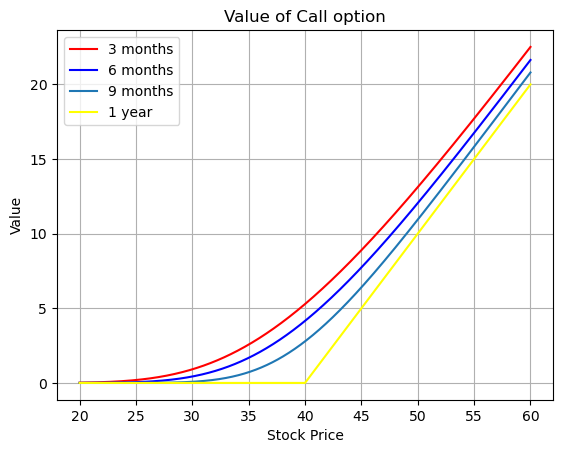

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def payoff(S, t):
    return black_scholes_call(S, 40, 1-t, 0.08, 0.3, 0)


S = np.linspace(20, 60, 1000)

P_1 = payoff(S, 0.25)
P_2 = payoff(S, 0.5)
P_3 = payoff(S, 1)
P_4 = payoff(S, 0.75)
# Plot Brownian motion
plt.plot(S, P_1, label = "3 months", color = "red")
plt.plot(S, P_2, label = "6 months", color = "blue")
plt.plot(S, P_4, label = "9 months")
plt.plot(S, P_3, label = "1 year", color = "yellow")

plt.xlabel('Stock Price')
plt.ylabel('Value')
plt.title('Value of Call option')
plt.grid(True)

plt.legend()
plt.show()

# Delta Hedging

In the following problems assume, unless otherwise stated, that S = 40, $\sigma = 30%$, r = 8%, and $\delta = 0$.
**Exercise 13.1** 
Suppose you sell a 45-strike call with 91 days to expiration. What is delta? If the option is on 100 shares, what investment is required for a delta-hedged portfolio? What is your overnight profit if the stock tomorrow is 39? What if the stock price is 40.50?

In [16]:
# I did the computation for option on ONE share of the stock
import numpy as np
delta = call_Delta(40, 45, 91/365, 0.08, 0.3, 0)
C = black_scholes_call(40, 45, 91/365, 0.08, 0.3, 0)
print(f"The delta is {-delta:.3f}")
print(f"The price of the call option is {C:.3f}")
Pi = delta * 40 - C 
print(f"The investment required is {Pi:.3f}")
C_new = black_scholes_call(39, 45, 90/365, 0.08, 0.3, 0)
print(f"The change in the call option price is {C_new - C:.3f}")
print(f"The interest we paid is {Pi * (np.exp(0.08 * 1/365) - 1):.3f}")
print(f"If the stock goes down to 39, the one day profit is {delta * (-1) - (C_new - C) - Pi * (np.exp(0.08 * 1/365) - 1):.4f}")

print("\n")
print("If the stock goes up to 40.5")
C_new = black_scholes_call(40.5, 45, 90/365, 0.08, 0.3, 0)
print(f"The new call option price is {C_new:.3f}")
print(f"The change in the call option price is {C_new - C:.3f}")
print(f"The overnight profit is {delta * (0.5) - (C_new - C) - Pi * (np.exp(0.08 * 1/365) - 1):.4f}")

The delta is -0.282
The price of the call option is 0.971
The investment required is 10.291
The change in the call option price is -0.266
The interest we paid is 0.002
If the stock goes down to 39, the one day profit is -0.0182


If the stock goes up to 40.5
The new call option price is 1.105
The change in the call option price is 0.134
The overnight profit is 0.0049


**Exercise 13.3** \
Suppose you buy a 40–45 bull spread with 91 days to expiration. If you delta-hedge this position, what investment is required? What is your overnight profit if the stock tomorrow is 39? What if the stock is 40.50?

In [50]:
import numpy as np
delta = 100 * (call_Delta(40, 40, 91/365, 0.08, 0.3, 0) - call_Delta(40, 45, 91/365, 0.08, 0.3, 0))
price = 100 * (black_scholes_call(40, 40, 91/365, 0.08, 0.3, 0) - black_scholes_call(40, 45, 91/365, 0.08, 0.3, 0))
print(f"The delta is {delta:.2f}")
print(f"The price of this position is {price:.2f}")
Pi = -delta * 40 + price
print(f"The investment required to create this delta-hedged portfolio is {Pi:.2f}")

print("\nIf the stock goes down to 39")
price_new = 100 * (black_scholes_call(39, 40, 90/365, 0.08, 0.3, 0) - black_scholes_call(39, 45, 90/365, 0.08, 0.3, 0))
print(f"The new value of the position is {price_new:.2f}")
print(f"The change in the value of this position is is {price_new - price:.2f}")
print(f"The interest we got is {-Pi * (np.exp(0.08 * 1/365) - 1):.2f}")
print(f"The profit on the stock is {-delta * (-1):.2f}")
print(f"The overall overnight profit is {30.09-30.04+0.22:.2f}")

print("\nIf the stock goes up to 40.5")
price_new = 100 * (black_scholes_call(40.5, 40, 90/365, 0.08, 0.3, 0) - black_scholes_call(40.5, 45, 90/365, 0.08, 0.3, 0))
print(f"The new value of the position is {price_new:.2f}")
print(f"The change in the value of this position is is {price_new - price:.2f}")
print(f"The interest we got is {-Pi * (np.exp(0.08 * 1/365) - 1):.2f}")
print(f"The profit on the stock is {-delta * (0.5):.2f}")
print(f"The overall overnight profit is {-delta * (0.5) + (price_new - price) - Pi * (np.exp(0.08 * 1/365) - 1):.4f}")

The delta is 30.09
The price of this position is 180.94
The investment required to create this delta-hedged portfolio is -1022.49

If the stock goes down to 39
The new value of the position is 150.90
The change in the value of this position is is -30.04
The interest we got is 0.22
The profit on the stock is 30.09
The overall overnight profit is 0.27

If the stock goes up to 40.5
The new value of the position is 195.75
The change in the value of this position is is 14.81
The interest we got is 0.22
The profit on the stock is -15.04
The overall overnight profit is -0.0102
